In [222]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def distance(X1, X2):
    def dist_sq(x1, x2):
        return np.sum((x1-x2)**2)
    
    K = 1/(len(X1)*len(X2))
                      
    distance = K*np.sum(np.array([[dist_sq(x1, x2) for x1 in X1] for x2 in X2]))
    return distance
                      
    
def distance_in_matrix(X1, X2, dist_mat):
    K = 1/(len(X1)*len(X2))
    distance = K*np.sum(np.array([[dist_mat[x1, x2] for x1 in X1] for x2 in X2]))
    return distance

#def find_min_pair(dist_mat):
#    N = len(dist_mat)
#    argmin = [(N-1, 0), dist_mat[N-1, 0]]
#    for i in range(1, len(dist_mat-1)):
#        for j in range(i):
#            if dist_mat[i, j] < argmin[1]:
#                argmin = [(i, j), dist_mat[i, j]]
#                
#    return argmin

def find_min_pair(list_of_clusters, dist_mat):
    N = len(list_of_clusters)
    argmin = [(N-1, 0), distance_in_matrix(list_of_clusters[N-1], list_of_clusters[0], dist_mat)]
    for i in range(1, N-1):
        for j in range(i):
            current_pair_distance = distance_in_matrix(list_of_clusters[i], list_of_clusters[j], dist_mat)
            if current_pair_distance < argmin[1]:
                argmin = [(i, j), current_pair_distance]
                
    return argmin


def merge(list_of_clusters, cluster_index_1, cluster_index_2):
    if len(list_of_clusters) == 1:
        return [list_of_clusters[0]]
    
    l = list_of_clusters.copy()
    cl_ind = sorted([cluster_index_1, cluster_index_2])
    new_cluster = l.pop(cl_ind[1]) + l.pop(cl_ind[0])

    new_list_of_clusters = l + [new_cluster]
    
    return new_cluster, new_list_of_clusters


def cluster_tree(dist_mat):
    
    labels = list(range(len(dist_mat)))
    G = nx.DiGraph()
    list_of_clusters = [(label,) for label in labels]
    G.add_nodes_from(list_of_clusters)
    final_matrix = []
    
    while len(list_of_clusters) > 1:
        k = find_min_pair(list_of_clusters, dist_mat)
        min_dist_indices, min_dist = k[0], k[1]
        new_cluster, new_list_of_clusters = merge(list_of_clusters, *min_dist_indices)
        final_matrix.append([min_dist_indices, min_dist, len(new_cluster)])
        G.add_node(tuple(new_cluster))
        G.add_edge(tuple(new_cluster), tuple(list_of_clusters[min_dist_indices[0]]))
        G.add_edge(tuple(new_cluster), tuple(list_of_clusters[min_dist_indices[1]]))
        list_of_clusters = new_list_of_clusters
        
    nx.draw_planar(G, with_labels=True)
    return final_matrix
    

def distance_matrix(X):
    '''
    Compute matrix of pair-wise distances between samples
    :param X: array-like of shape (n_samples, n_features)
        Samples
    :return D: array-like of shape (n_samples, n_samples) 
        Matrix of pair-wise distances between samples
    '''
    D = np.array([[np.sqrt(np.sum((x-y)**2)) for x in X] for y in X]) # I hate the creators of np.outer
                                                                      # and pythonic functional programming
                                                                      # in general, because this is just
                                                                      # dist(outer(X, X)) and there appears to be
                                                                      # no conscise way to do this using numpy
                                                                      # because np.outer always applies * and 
                                                                      # np.ufunc.outer does not support creating tuples

    return D






In [149]:
merge([[1, 2, 3], [1, 2], [3, 1]], 0, 1)

[[3, 1], [1, 2, 1, 2, 3]]

[[(5, 3), 0.43, 2],
 [(4, 3), 0.55, 2],
 [(3, 2), 0.6599999999999999, 3],
 [(1, 0), 0.74, 2],
 [(1, 0), 0.82, 5],
 [(1, 0), 1.12, 7]]

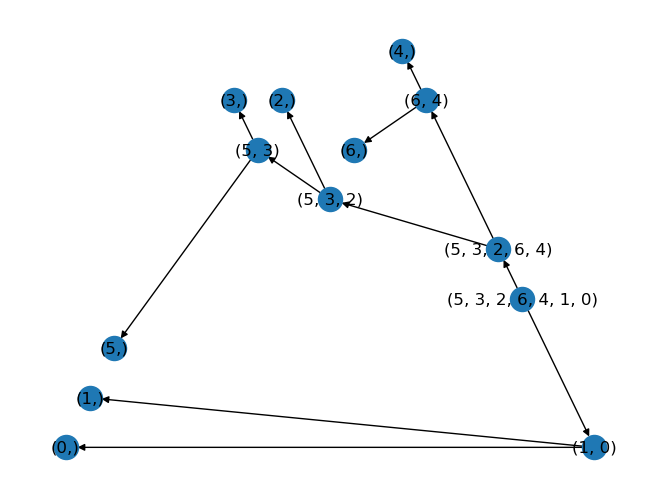

In [223]:
diamat = np.array([[0, 1, 2, 3],[1, 0, 7, 4],[2, 7, 0, 1], [3, 4, 1, 0]])

Y = np.array([[1, 3, 4], [0, 4, 2], [6, 7, 5], [9, 8, 8], [3, 7, 1], [6, 4, 2], [1, 1, 1], [5, 5, 6], [9, 7, 1]])


#D = distance_matrix(Y)

#cluster_tree(D)

K = np.array([[0.  , 0.74, 0.85, 0.54, 0.83, 0.92, 0.89],
              [0.74, 0.  , 1.59, 1.35, 1.2 , 1.48, 1.55],
              [0.85, 1.59, 0.  , 0.63, 1.13, 0.69, 0.73],
              [0.54, 1.35, 0.63, 0.  , 0.66, 0.43, 0.88],
              [0.83, 1.2 , 1.13, 0.66, 0.  , 0.72, 0.55],
              [0.92, 1.48, 0.69, 0.43, 0.72, 0.  , 0.8 ],
              [0.89, 1.55, 0.73, 0.88, 0.55, 0.8 , 0.  ]])

cluster_tree(K)

In [12]:
a = np.array([[[i, j] for i in range(3)] for j in range(3)])
print(a)
np.sum(a)

[[[0 0]
  [1 0]
  [2 0]]

 [[0 1]
  [1 1]
  [2 1]]

 [[0 2]
  [1 2]
  [2 2]]]


18

In [3]:
def distance_matrix(X):
    '''
    Compute matrix of pair-wise distances between samples
    :param X: array-like of shape (n_samples, n_features)
        Samples
    :return D: array-like of shape (n_samples, n_samples) 
        Matrix of pair-wise distances between samples
    '''
    D = np.array([[np.sqrt(np.sum((x-y)**2)) for x in X] for y in X]) # I hate the creators of np.outer
                                                                      # and pythonic functional programming
                                                                      # in general, because this is just
                                                                      # dist(outer(X, X)) and there appears to be
                                                                      # no conscise way to do this using numpy
                                                                      # because np.outer always applies * and 
                                                                      # np.ufunc.outer does not support creating tuples

    return D



In [4]:
distance_matrix(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 2, 3.5]]))

def hierarchical_clustering(dist_matrix):
    

array([[ 0.        ,  5.19615242, 10.39230485,  0.5       ],
       [ 5.19615242,  0.        ,  5.19615242,  4.9244289 ],
       [10.39230485,  5.19615242,  0.        , 10.11187421],
       [ 0.5       ,  4.9244289 , 10.11187421,  0.        ]])

In [105]:
a = [[1, 2], [2, 3], [3, 4]]
d = a.pop(0) + a.pop(0)
print(d)

sorted([3, 2, 1, 2
        

[1, 2, 2, 3]


[1, 2, 2, 3]

In [177]:
a = [[i] for i in range(10)]
print(a)

a = [1, 2, 3]
b = a.copy()
print(b)
a[2] = 100
print(b)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
[1, 2, 3]
[1, 2, 3]
